# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student_loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [51]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/mbc/ai/m6/datasets/student_loans.csv"
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
# Review the data types associated with the columns
df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [53]:
# Define the target set y using the credit_ranking column
y = df['credit_ranking'].ravel()

# Display a sample of y
y[:5]

array([5, 5, 5, 6, 5], dtype=int64)

In [6]:
# Define features set X by selecting all columns but credit_ranking
X = df.drop('credit_ranking', axis = 1)

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [34]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_s = X_scaler.transform(X_train)
X_test_s = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [36]:
# Define the the number of inputs (features) to the model
n_inputs = 11

# Review the number of features
print(n_inputs)

11


In [37]:
# Define the number of neurons in the output layer
output = 1

In [38]:
# Define the number of hidden nodes for the first hidden layer
hidden_1 = 6

# Review the number hidden nodes in the first layer
print(hidden_1)

6


In [39]:
# Define the number of hidden nodes for the second hidden layer
hidden_2 = 3

# Review the number hidden nodes in the second layer
print(hidden_2)

3


In [40]:
# Create the Sequential model instance
nn = Sequential()

In [41]:
# Add the first hidden layer
nn.add(Dense(units = hidden_1, activation = 'relu', input_dim = n_inputs))


In [42]:
# Add the second hidden layer
nn.add(Dense(units = hidden_2, activation = 'relu'))

In [43]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units = output, activation = 'linear'))

In [44]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 3)                 21        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `mse` loss function, the `adam` optimizer, and the `mse` evaluation metric.


In [56]:
# Compile the Sequential model
nn.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [57]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_s, y_train, epochs = 50)

Epoch 1/50
38/38 [==============================] - 1s 3ms/step - loss: 0.5362 - mse: 0.5362
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 0.5239 - mse: 0.5239
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 0.5206 - mse: 0.5206
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 0.5163 - mse: 0.5163
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.5048 - mse: 0.5048
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4984 - mse: 0.4984
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4909 - mse: 0.4909
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4869 - mse: 0.4869
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4863 - mse: 0.4863
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4802 - mse: 0.4802
Epoch 11/50
38/38 [==============================] - 0s 2ms/step - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


<Axes: >

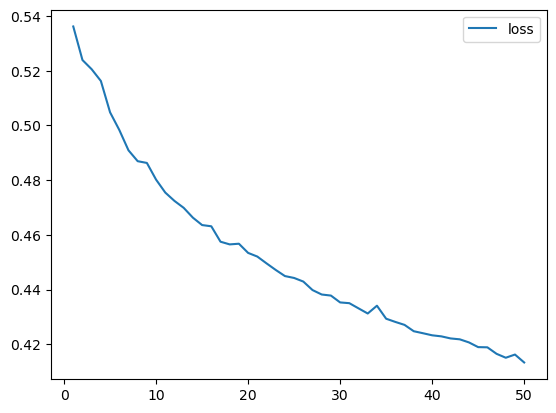

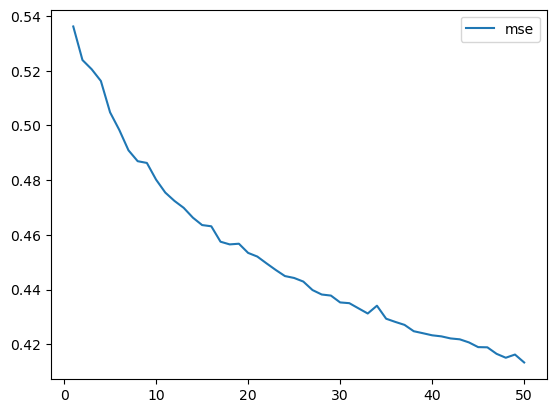

In [59]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Display the model loss and accuracy results
df.plot(y="loss")
df.plot(y="mse")

### Step 4: Save and export your model to an HDF5 file, and name the file `student_loans.h5`.


In [63]:
# Set the model's file path
file_path = Path("saved_models/student_loan.h5")

# Export your model to a HDF5 file
nn.save(file_path)

C:\Users\sndor\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [65]:
# Set the model's file path
file_path = Path("saved_models/student_loan.h5")

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

### Step 2: Make predictions on the testing data.

In [67]:
# Make predictions on the testing data
predictions = (nn_imported.predict(X_test_s)).astype("int32")

13/13 [==============================] - 0s 2ms/step


### Step 3: Create a DataFrame to compare the predictions with the actual values.

In [68]:
# Create a DataFrame to compare the predictions with the actual values
res = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})

### Step 4: Display a sample of the DataFrame you created in step 3.

In [69]:
# Display sample data
res.head()

,predictions,actual
0,5,5
1,5,6
2,6,6
3,5,6
4,6,6
